# Introduction :
- Yelp is a which publish crowd-sourced reviews about local businesses, as well as the online reservation service Yelp Reservations. The company also trains small businesses in how to respond to reviews, hosts social events for reviewers, and provides data about businesses, including health inspection scores.

- Yelp was founded in 2004 by former PayPal employees. By 2010 it had $30 million in revenues and the website had published more than 4.5 million crowd-sourced reviews.

**Attribues of review table are as following :**

- review_id: ID of the review
- user_id: ID of the user
- business_id: ID of the business
- stars: ratings of the business
- date: review date
- text: review from the user
- useful: number of users who vote a review as usefull
- funny: number of users who vote a review as funny
- cool: number of users who vote a review as cool

### Yelp Reviews Dataset Exploring

In [1]:
import json  
import pandas as pd  
from pandas.io.json import json_normalize  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
reviews = pd.read_csv('yelp_review.csv')

In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   date         object
 5   text         object
 6   useful       int64 
 7   funny        int64 
 8   cool         int64 
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [4]:
reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [5]:
reviews["review_id"].nunique()

5261668

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   date         object
 5   text         object
 6   useful       int64 
 7   funny        int64 
 8   cool         int64 
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [7]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

##### Rating distribution :

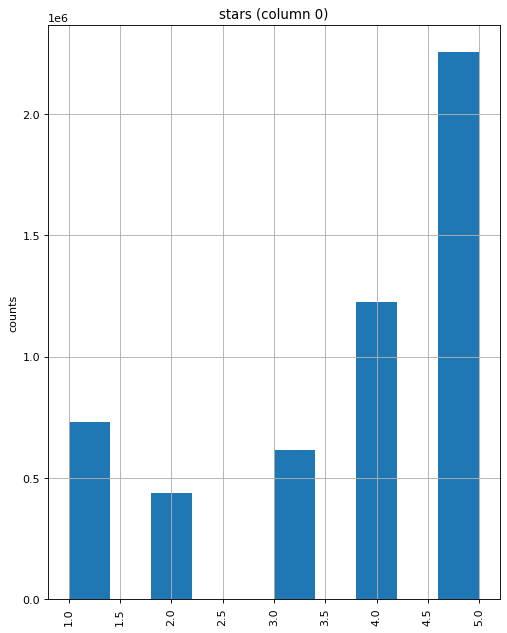

In [8]:
plotPerColumnDistribution(reviews,8,3)

In [9]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.columns.name
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

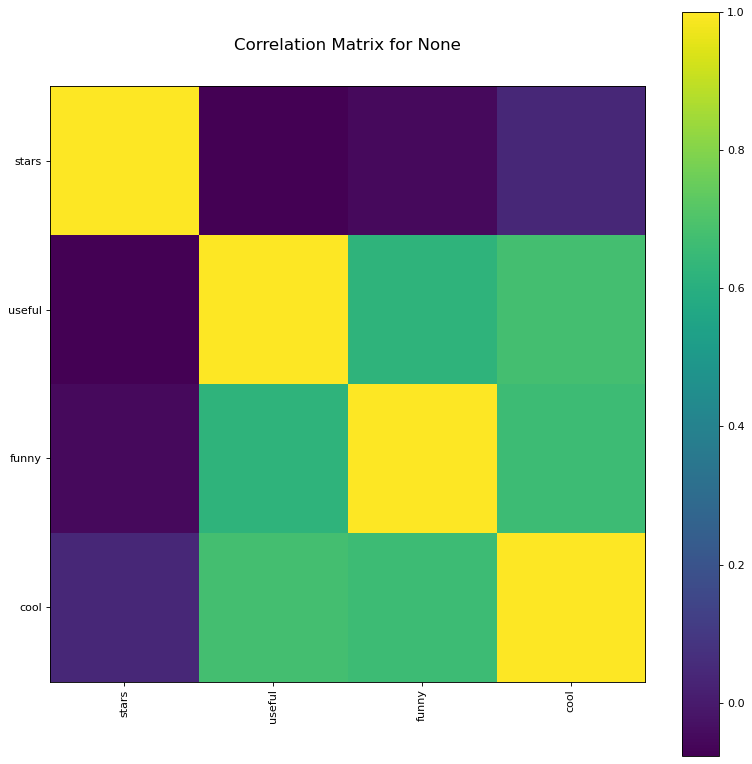

In [10]:
plotCorrelationMatrix(reviews,12)

In [11]:
reviews['text'][5261663]

"Bought groupon $39 for 4 months from groupon, the sign up guy tried so hard to sell a 'new' package to me.  I asked him if I can make up my mind after I tried the gym out first, but he insisted I do it now or else the price will go up.  As a matter of fact, he has a price increase meeting tomorrow....hahaha\n\nDid not opt for the 'new' package, stuck with my original package.  He seemed upset...said fine, your membership expires in 4 months, you just get your membership and nothing else, you will have to pay for parking too.  I told him...but I see that there is a sign that says one hr free parking.  umm...err...ehhh...yeah, well, only one hr free, after that you will have to pay $3\\/hr.  whatever...\n\nAfter signing everything, he said you will get your access card after you finish your assessment (aka personal trainer sales pitch).  I told  him I do not need an assessment as I will only be using the treadmill.  He said I HAVE to get an assessment for insurance purpose....LAAAME!\n\

In [12]:
reviews['useful'][5261663]

36

In [13]:
reviews['cool'][5261663]

3

In [14]:
reviews['funny'][5261663]

3

In [15]:
reviews['stars'][5261663]

1

In [16]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [17]:
#plotScatterMatrix(review,12,15)

In [18]:
reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

In [19]:
reviews.review_id.duplicated().sum()

0

**No Nulls or Duplicates**

## Yelp Business Dataset Exploring

**Attributes of business table are as following:**

- business_id: ID of the business
- name: name of the business
- address: address of the business
- city: city of the business
- state: state of the business
- postal_code: postal code of the business
- latitude: latitude of the business
- longitude: longitude of the business
- stars: average rating of the business
- review_count: number of reviews received
- is_open: 1 if the business is open, 0 therwise
- categories: multiple categories of the business

In [20]:
business = pd.read_csv('yelp_business.csv')
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.4627,-80.8526,3.5000,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.5694,-111.8903,5.0000,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",NaN
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.4800,-73.5801,5.0000,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.2197,-115.1277,2.5000,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.4281,-111.7266,4.5000,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [21]:
## remove quotation marks in name and address column
business.name=business.name.str.replace('"','')
business.address=business.address.str.replace('"','')

## filter restaurants of US
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
usa=business.loc[business['state'].isin(states)]
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.4627,-80.8526,3.5000,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.5694,-111.8903,5.0000,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",NaN
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.4800,-73.5801,5.0000,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.2197,-115.1277,2.5000,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.4281,-111.7266,4.5000,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [22]:
## select all restaurants in USA
us_restaurants=usa[usa['categories'].str.contains('Restaurants') == True]

## select out 16 cuisine types of restaurants and rename the category
us_restaurants.is_copy=False
us_restaurants['category']=pd.Series()
us_restaurants.loc[us_restaurants.categories.str.contains('American'),'category'] = 'American'
us_restaurants.loc[us_restaurants.categories.str.contains('Mexican'), 'category'] = 'Mexican'
us_restaurants.loc[us_restaurants.categories.str.contains('Italian'), 'category'] = 'Italian'
us_restaurants.loc[us_restaurants.categories.str.contains('Japanese'), 'category'] = 'Japanese'
us_restaurants.loc[us_restaurants.categories.str.contains('Chinese'), 'category'] = 'Chinese'
us_restaurants.loc[us_restaurants.categories.str.contains('Thai'), 'category'] = 'Thai'
us_restaurants.loc[us_restaurants.categories.str.contains('Mediterranean'), 'category'] = 'Mediterranean'
us_restaurants.loc[us_restaurants.categories.str.contains('French'), 'category'] = 'French'
us_restaurants.loc[us_restaurants.categories.str.contains('Vietnamese'), 'category'] = 'Vietnamese'
us_restaurants.loc[us_restaurants.categories.str.contains('Greek'),'category'] = 'Greek'
us_restaurants.loc[us_restaurants.categories.str.contains('Indian'),'category'] = 'Indian'
us_restaurants.loc[us_restaurants.categories.str.contains('Korean'),'category'] = 'Korean'
us_restaurants.loc[us_restaurants.categories.str.contains('Hawaiian'),'category'] = 'Hawaiian'
us_restaurants.loc[us_restaurants.categories.str.contains('African'),'category'] = 'African'
us_restaurants.loc[us_restaurants.categories.str.contains('Spanish'),'category'] = 'Spanish'
us_restaurants.loc[us_restaurants.categories.str.contains('Middle_eastern'),'category'] = 'Middle_eastern'
us_restaurants.category[:20]

<ipython-input-22-a7515825291a>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  us_restaurants['category']=pd.Series()
<ipython-input-22-a7515825291a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_restaurants['category']=pd.Series()
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


8             NaN
20            NaN
33            NaN
36        Mexican
41     Vietnamese
42       American
44        Mexican
46       American
49            NaN
50        Chinese
54            NaN
59            NaN
61       American
63            NaN
83       American
86            NaN
89           Thai
100           NaN
101           NaN
102           NaN
Name: category, dtype: object

In [23]:
us_restaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,category
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.1104,-88.2331,4.5000,5,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14...",NaN
20,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.1949,-80.7674,3.0000,5,0,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",NaN,NaN
33,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.6028,-111.9835,4.0000,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Food, Pretzels, Bakeries, Fast Food, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",NaN
36,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.0997,-115.3016,2.5000,15,0,"{'Alcohol': ""u'none'"", 'WiFi': ""u'no'"", 'GoodF...","Mexican, Restaurants, Fast Food",NaN,Mexican
41,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.5122,-81.6633,4.5000,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",Vietnamese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209380,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,2820 N 75th Ave,Phoenix,AZ,85035,33.4791,-112.2211,2.0000,106,1,"{'NoiseLevel': ""'very_loud'"", 'WiFi': ""'no'"", ...","Nightlife, American (Traditional), Chicken Win...",NaN,American
209381,xVpE01l6ZXdEtVf5PkRpDg,Julep,829 E Washington Ave,Madison,WI,53703,43.0810,-89.3740,4.0000,95,0,"{'NoiseLevel': ""u'average'"", 'BikeParking': 'T...","Nightlife, Diners, Bars, Southern, Restaurants","{'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'...",NaN
209383,BAVuLTDmpSzDCk37A5HjtQ,Bruegger's Bagels,27045 Lorain Rd,North Olmsted,OH,44070,41.4166,-81.9214,3.0000,13,0,"{'NoiseLevel': ""u'average'"", 'BikeParking': 'F...","Restaurants, Sandwiches, Food, Breakfast & Bru...","{'Monday': '5:30-15:0', 'Tuesday': '5:30-15:0'...",NaN
209385,hskVqZCPqy-omm9CHi44xQ,Domino's,"6420 Rea Rd, Suite B1",Charlotte,NC,28226,35.0785,-80.8184,2.0000,16,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Pizza, Sandwiches, Fast Food, Chi...","{'Monday': '10:30-0:0', 'Tuesday': '10:30-0:0'...",NaN


In [24]:
us_restaurants.dropna(axis=0,subset=['category'],inplace=True)

<ipython-input-24-b8190b65da72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_restaurants.dropna(axis=0,subset=['category'],inplace=True)


In [25]:
us_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22779 entries, 36 to 209390
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   22779 non-null  object 
 1   name          22779 non-null  object 
 2   address       22635 non-null  object 
 3   city          22779 non-null  object 
 4   state         22779 non-null  object 
 5   postal_code   22763 non-null  object 
 6   latitude      22779 non-null  float64
 7   longitude     22779 non-null  float64
 8   stars         22779 non-null  float64
 9   review_count  22779 non-null  int64  
 10  is_open       22779 non-null  int64  
 11  attributes    22556 non-null  object 
 12  categories    22779 non-null  object 
 13  hours         19006 non-null  object 
 14  category      22779 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 2.8+ MB


In [26]:
us_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,category
36,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.0997,-115.3016,2.5000,15,0,"{'Alcohol': ""u'none'"", 'WiFi': ""u'no'"", 'GoodF...","Mexican, Restaurants, Fast Food",NaN,Mexican
41,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.5122,-81.6633,4.5000,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",Vietnamese
42,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,36.0712,-115.2075,3.0000,10,0,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Burgers, Restaurants, American (Traditional), ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",American
44,Ga2Bt7xfqoggTypWD5VpoQ,Amando's Bros,2602 W Southern Ave,Tempe,AZ,85282,33.3932,-111.9763,4.0000,9,0,"{'Caters': 'False', 'RestaurantsGoodForGroups'...","Mexican, Restaurants","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",Mexican
46,xFc50drSPxXkcLvX5ygqrg,Boomer's Sweet Home Chicago,"5932 W Bell Rd, Ste D-109",Glendale,AZ,85308,33.6404,-112.1870,3.5000,12,0,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Burgers, Fast Food, American (New), Restaurant...",NaN,American


In [27]:
us_restaurants = us_restaurants.reset_index(drop=True)
us_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,category
0,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.0997,-115.3016,2.5000,15,0,"{'Alcohol': ""u'none'"", 'WiFi': ""u'no'"", 'GoodF...","Mexican, Restaurants, Fast Food",NaN,Mexican
1,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.5122,-81.6633,4.5000,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",Vietnamese
2,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,36.0712,-115.2075,3.0000,10,0,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Burgers, Restaurants, American (Traditional), ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",American
3,Ga2Bt7xfqoggTypWD5VpoQ,Amando's Bros,2602 W Southern Ave,Tempe,AZ,85282,33.3932,-111.9763,4.0000,9,0,"{'Caters': 'False', 'RestaurantsGoodForGroups'...","Mexican, Restaurants","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",Mexican
4,xFc50drSPxXkcLvX5ygqrg,Boomer's Sweet Home Chicago,"5932 W Bell Rd, Ste D-109",Glendale,AZ,85308,33.6404,-112.1870,3.5000,12,0,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Burgers, Fast Food, American (New), Restaurant...",NaN,American


In [28]:
us_restaurants.isnull().sum()

business_id        0
name               0
address          144
city               0
state              0
postal_code       16
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes       223
categories         0
hours           3773
category           0
dtype: int64

In [29]:
us_restaurants["hours"].value_counts()

{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'Wednesday': '0:0-0:0', 'Thursday': '0:0-0:0', 'Friday': '0:0-0:0', 'Saturday': '0:0-0:0', 'Sunday': '0:0-0:0'}                  951
{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22:0', 'Thursday': '11:0-22:0', 'Friday': '11:0-23:0', 'Saturday': '11:0-23:0', 'Sunday': '11:0-22:0'}    410
{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22:0', 'Thursday': '11:0-22:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0', 'Sunday': '11:0-22:0'}    336
{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0', 'Sunday': '11:0-21:0'}    244
{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0', 'Sunday': '11:0-21:0'}    239
                                                                                                                   

In [30]:
us_restaurants.shape

(22779, 15)

In [31]:
us_restaurants = us_restaurants.fillna(us_restaurants['hours'].value_counts().index[0])

In [32]:
us_restaurants.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
category        0
dtype: int64

In [33]:
us_restaurants.duplicated().sum()

0

In [34]:
us_restaurants.shape

(22779, 15)

In [35]:
### Merging the two datasets together to get a new one

In [36]:
us_restaurants_reviews = pd.merge(us_restaurants,reviews,on="business_id")

In [37]:
us_restaurants_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952262 entries, 0 to 1952261
Data columns (total 23 columns):
 #   Column        Dtype  
---  ------        -----  
 0   business_id   object 
 1   name          object 
 2   address       object 
 3   city          object 
 4   state         object 
 5   postal_code   object 
 6   latitude      float64
 7   longitude     float64
 8   stars_x       float64
 9   review_count  int64  
 10  is_open       int64  
 11  attributes    object 
 12  categories    object 
 13  hours         object 
 14  category      object 
 15  review_id     object 
 16  user_id       object 
 17  stars_y       int64  
 18  date          object 
 19  text          object 
 20  useful        int64  
 21  funny         int64  
 22  cool          int64  
dtypes: float64(3), int64(6), object(14)
memory usage: 357.5+ MB


In [38]:
us_restaurants_reviews.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars_x         0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
category        0
review_id       0
user_id         0
stars_y         0
date            0
text            0
useful          0
funny           0
cool            0
dtype: int64

In [39]:
us_restaurants_reviews.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,hours,category,review_id,user_id,stars_y,date,text,useful,funny,cool
0,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.0997,-115.3016,2.5000,15,...,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Mexican,i2Soid_X8XsSTyIrPOst6g,xammeA3ftpFoAN13v5Blyg,1,2015-04-02,WORST experience EVER!!!!! never have i ate an...,2,0,0
1,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.0997,-115.3016,2.5000,15,...,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Mexican,Xg7HuBvuZHTBog1G_2Wk0w,0PXhJMztE3ijzQPjiwPERg,3,2015-03-23,Beer battered cod fish seems really rubbery. I...,0,0,0
2,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.0997,-115.3016,2.5000,15,...,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Mexican,WUAt5-krh075Ie44np8Hew,YDkC5VVT8s9NlIZtAr8NUA,5,2010-11-27,So why would I be giving a Fast Food chain loc...,0,0,0
3,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.0997,-115.3016,2.5000,15,...,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Mexican,IH998Fi8vDa6In8oyYa3bA,77lef7kKkoOVupY-7AmieQ,4,2011-04-07,Customer service has been top notch on every v...,0,0,0
4,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.0997,-115.3016,2.5000,15,...,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Mexican,S9vIs-je49jqbhpWSQ8yHg,mxtalrN7VHVQwGjv8ln5yg,2,2016-03-19,I come here bout 3x's a mo. & I just can't do ...,0,0,0


- As we know the column star **[stars_x in us_restaurants_reviews dataframe]** in business is about average rating of the business
- And star **[stars_y in us_restaurants_reviews dataframe]** in reviews is about rating of the review

We will rename these columns

In [40]:
us_restaurants_reviews.rename(columns={"stars_x":"business_star","stars_y":"review_star"},inplace=True)

In [41]:
us_restaurants_reviews.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'business_star', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'category', 'review_id', 'user_id',
       'review_star', 'date', 'text', 'useful', 'funny', 'cool'],
      dtype='object')

**We will add column of number of words in review and label of negative and postive reviews**

In [42]:
us_restaurants_reviews['num_words_review'] = us_restaurants_reviews.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').map(lambda x: len(x.split()))

**Add label review as positive or negative**

In [43]:
us_restaurants_reviews['labels'] = ''
us_restaurants_reviews.loc[us_restaurants_reviews.review_star >= 4, "labels"] = "positive"
us_restaurants_reviews.loc[us_restaurants_reviews.review_star == 3, "labels"] = "neutral"
us_restaurants_reviews.loc[us_restaurants_reviews.review_star < 3, "labels"] = "negative"

In [44]:
us_restaurants_reviews.labels.value_counts()

positive    1289667
negative     406438
neutral      256157
Name: labels, dtype: int64

**We can drop neutral reviews for better analysis**

In [45]:
us_restaurants_reviews.drop(us_restaurants_reviews[us_restaurants_reviews['labels'] =='neural'].index, axis=0, inplace=True)
us_restaurants_reviews.reset_index(drop=True, inplace=True)

In [46]:
us_restaurants_reviews.shape

(1952262, 25)

In [47]:
us_restaurants_reviews.isnull().sum().any()

False

**Ok we will move to Analysis**

## Analysis

**The top 10 cites**

In [48]:
us_restaurants.city.value_counts()[0:10]

Las Vegas     4376
Phoenix       2593
Charlotte     1697
Pittsburgh    1496
Scottsdale    1089
Cleveland      823
Mesa           799
Madison        688
Tempe          648
Henderson      576
Name: city, dtype: int64

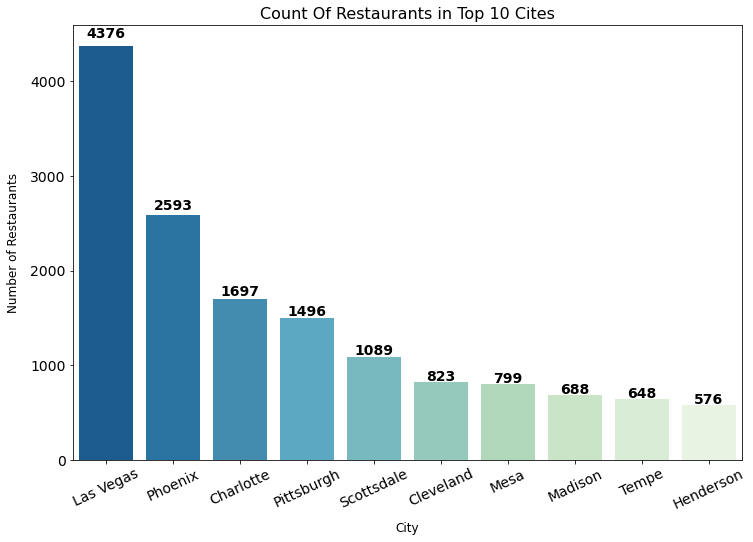

In [49]:
plt.figure(figsize=(12,8))
top_10 = us_restaurants.city.value_counts()[0:10]
sns.barplot(top_10.index,top_10.values,palette=sns.color_palette("GnBu_r", len(top_10)))
plt.title("Count Of Restaurants in Top 10 Cites",fontsize=16)
plt.xlabel("City",fontsize=12,labelpad=10)
plt.ylabel("Number of Restaurants",fontsize=12,labelpad=10)
plt.tick_params(labelsize=14)
plt.xticks(rotation=25)
for n,m in enumerate(top_10):
    plt.text(n,m*1.02,str(m),horizontalalignment ='center',fontweight='bold', fontsize=14)

**Distribution of restaurants in each category**

In [50]:
us_restaurants["category"].nunique()

15

In [51]:
us_restaurants["category"].unique()

array(['Mexican', 'Vietnamese', 'American', 'Chinese', 'Thai', 'Italian',
       'Mediterranean', 'Japanese', 'Indian', 'Spanish', 'African',
       'Greek', 'Korean', 'French', 'Hawaiian'], dtype=object)

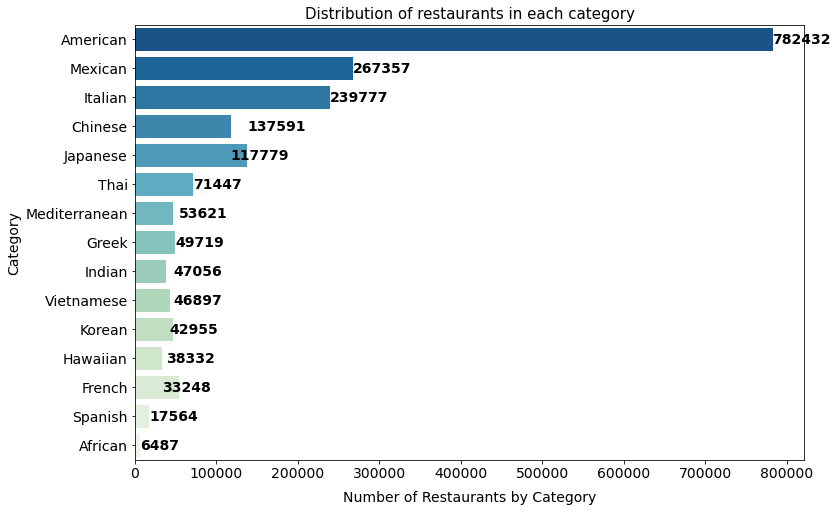

In [52]:
plt.figure(figsize=(12,8))
dis_category = us_restaurants.category.value_counts()
sns.countplot(y='category',data=us_restaurants_reviews, 
              order = dis_category.index, palette= sns.color_palette("GnBu_r", len(dis_category)))
plt.title('Distribution of restaurants in each category', fontsize=15)
plt.xlabel('Number of Restaurants by Category', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.tick_params(labelsize=14)
for  m, n in enumerate(us_restaurants_reviews.category.value_counts()):
    plt.text(n, m+0.15, str(n), fontweight='bold', fontsize=14)

**Distribution of restaurants in each state**

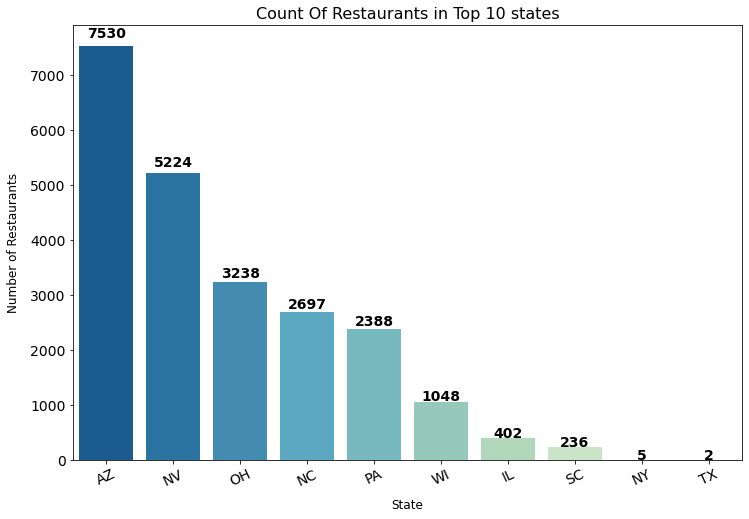

In [53]:
plt.figure(figsize=(12,8))
top_10_state = us_restaurants.state.value_counts()[0:10]
sns.barplot(top_10_state.index,top_10_state.values,palette=sns.color_palette("GnBu_r", len(top_10_state)))
plt.title("Count Of Restaurants in Top 10 states",fontsize=16)
plt.xlabel("State",fontsize=12,labelpad=10)
plt.ylabel("Number of Restaurants",fontsize=12,labelpad=10)
plt.tick_params(labelsize=14)
plt.xticks(rotation=25)
for n,m in enumerate(top_10_state):
    plt.text(n,m*1.02,str(m),horizontalalignment ='center',fontweight='bold', fontsize=14)

**Distribution Of Reviews in Top 10 cites**

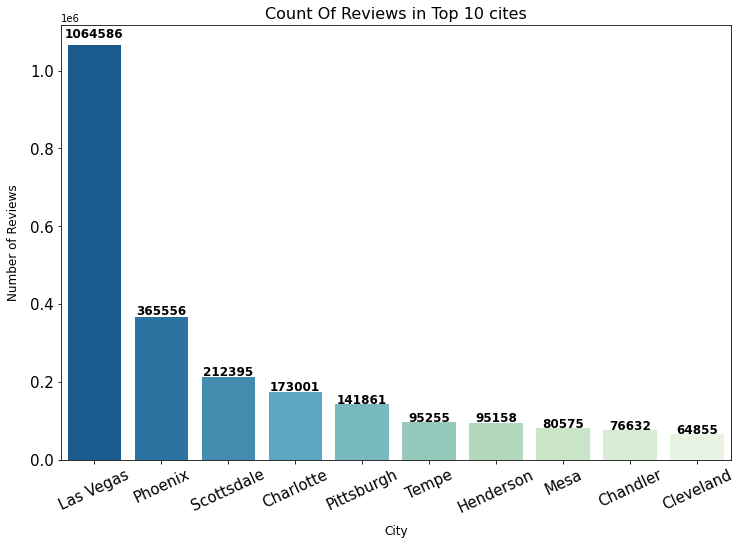

In [54]:
plt.figure(figsize=(12,8))
top_10_state = us_restaurants.groupby("city")["review_count"].sum().sort_values(ascending=False)[0:10]
sns.barplot(top_10_state.index,top_10_state.values,palette=sns.color_palette("GnBu_r", len(top_10_state)))
plt.title("Count Of Reviews in Top 10 cites",fontsize=16)
plt.xlabel("City",fontsize=12,labelpad=10)
plt.ylabel("Number of Reviews",fontsize=12,labelpad=10)
plt.tick_params(labelsize=15)
plt.xticks(rotation=25)
for n,m in enumerate(top_10_state):
    plt.text(n,m*1.02,str(m),horizontalalignment ='center',fontweight='bold', fontsize=12)

### Reviews Distribution
**Distribution of reviews by cuisine type**

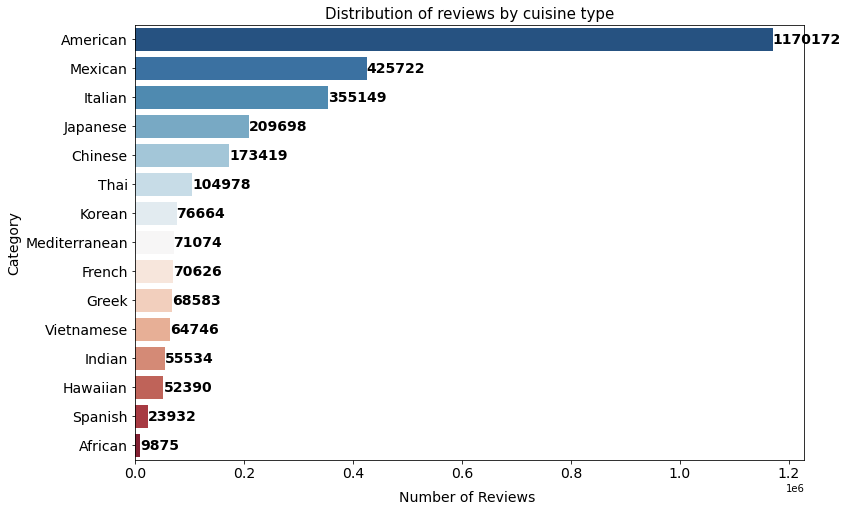

In [55]:
plt.figure(figsize=(12,8))
dis_category = us_restaurants.groupby("category")["review_count"].sum().sort_values(ascending=False)
sns.barplot(y=dis_category.index,x=dis_category.values,palette= sns.color_palette("RdBu_r", len(dis_category)))
plt.title('Distribution of reviews by cuisine type', fontsize=15)
plt.xlabel('Number of Reviews ', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.tick_params(labelsize=14)
for  m, n in enumerate(dis_category):
    plt.text(n, m+0.15, str(n), fontweight='bold', fontsize=14)

**Distribution of reviews for Top 10 Restaurants**

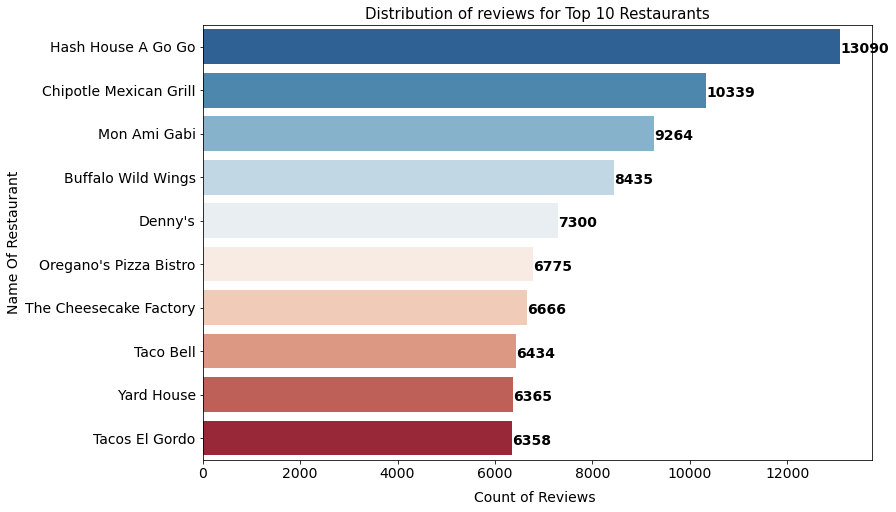

In [56]:
plt.figure(figsize=(12,8))
dis_category = us_restaurants.groupby("name")["review_count"].sum().sort_values(ascending=False)[0:10]
sns.barplot(y=dis_category.index,x=dis_category.values,palette= sns.color_palette("RdBu_r", len(dis_category)))
plt.title('Distribution of reviews for Top 10 Restaurants', fontsize=15)
plt.xlabel('Count of Reviews ', fontsize=14, labelpad=10)
plt.ylabel('Name Of Restaurant', fontsize=14)
plt.tick_params(labelsize=14)
for  m, n in enumerate(dis_category):
    plt.text(n, m+0.15, str(n), fontweight='bold', fontsize=14)

**Distribution of Rating by US Restaurants**

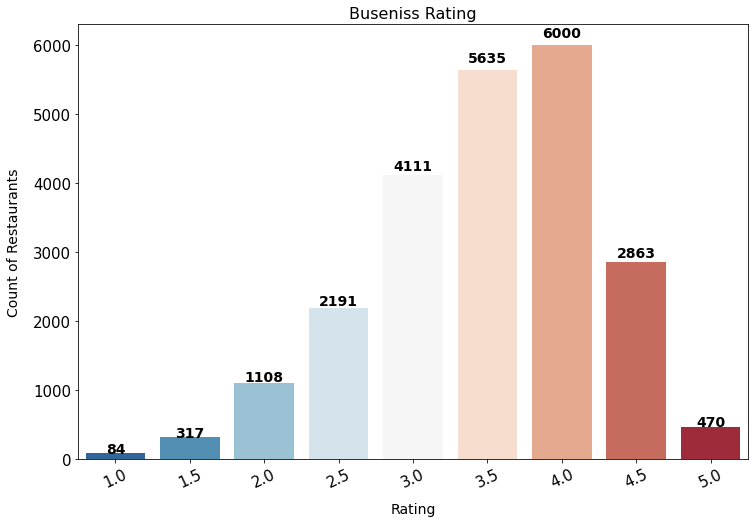

In [57]:
plt.figure(figsize=(12,8))
rating = us_restaurants.stars.value_counts().sort_index()
sns.barplot(rating.index,rating.values,palette=sns.color_palette("RdBu_r", len(rating)))
plt.title("Buseniss Rating",fontsize=16)
plt.xlabel("Rating",fontsize=14,labelpad=12)
plt.ylabel("Count of Restaurants",fontsize=14,labelpad=12)
plt.tick_params(labelsize=15)
plt.xticks(rotation=25)
for n,m in enumerate(rating):
    plt.text(n,m*1.02,str(m),horizontalalignment ='center',fontweight='bold', fontsize=14)

**Distribution of Rating by Reviews**

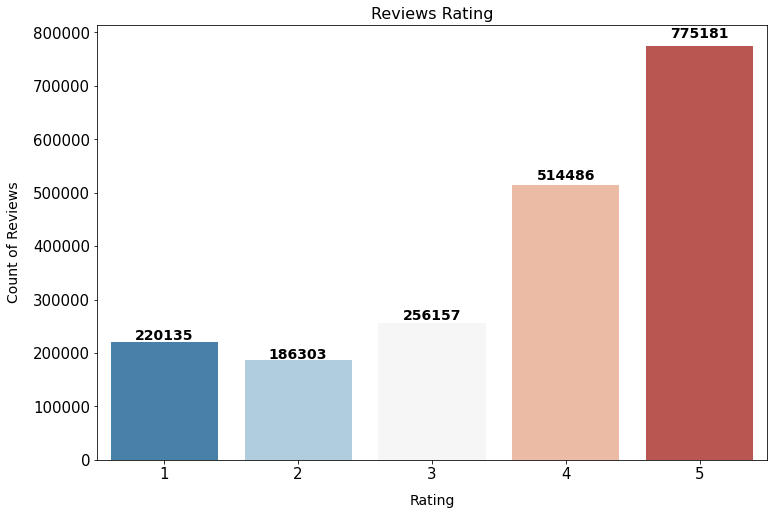

In [58]:
plt.figure(figsize=(12,8))
rating = us_restaurants_reviews.review_star.value_counts().sort_index()
sns.barplot(rating.index,rating.values,palette=sns.color_palette("RdBu_r", len(rating)))
plt.title("Reviews Rating",fontsize=16)
plt.xlabel("Rating",fontsize=14,labelpad=12)
plt.ylabel("Count of Reviews",fontsize=14,labelpad=12)
plt.tick_params(labelsize=15)
plt.xticks(rotation=0)
for n,m in enumerate(rating):
    plt.text(n,m*1.02,str(m),horizontalalignment ='center',fontweight='bold', fontsize=14)

**Average length of words in each category**

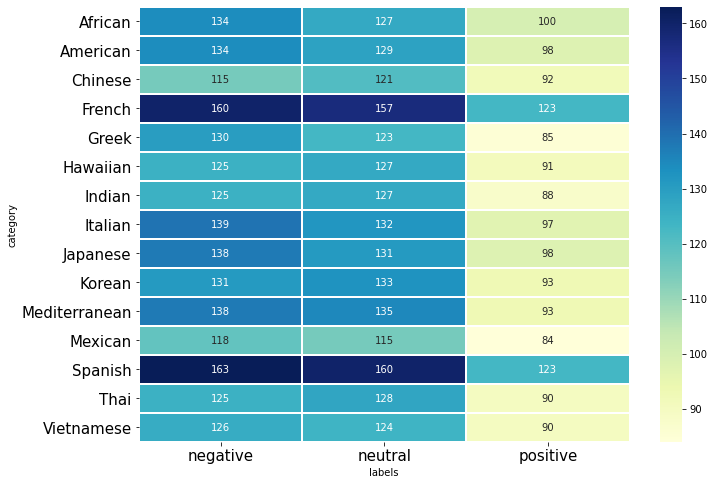

In [59]:
num_words = us_restaurants_reviews.groupby(['category','labels'])['num_words_review'].mean().round().unstack()
plt.figure(figsize=(11,8))
sns.heatmap(num_words, cmap='YlGnBu', fmt='g',annot=True, linewidths=1)
plt.tick_params(labelsize=15)

## Reviews Analysis

**Now we will search for postive and negative words in reviews**

In [60]:
## Change all text to lower letter
us_restaurants_reviews.text = us_restaurants_reviews.text.str.lower()

In [61]:
## Remove all symbols and punctuation
us_restaurants_reviews['cleaned_review'] = us_restaurants_reviews.text.str.replace('\n','').\
                                str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','')

**import positive file which contains common meaningless positive words such as good**

In [62]:
positive_words = open('positive.txt')
reader =csv.reader(positive_words)
positive_words = [word[0] for word in reader]

**import negative file which contains common meaningless negative words such as bad**

In [63]:
negative_words = open('negative.txt')
reader =csv.reader(negative_words)
negative_words = [word[0] for word in reader]

In [64]:
## get dataset by category
def get_dataset(category):
    df = us_restaurants_reviews[['cleaned_review','labels']][us_restaurants_reviews.category==category]
    df.reset_index(drop=True, inplace =True)
    df.rename(columns={'cleaned_review':'text'}, inplace=True)
    return df

In [65]:
## only keep positive and negative words
def filter_words(review):
    words = [word for word in review.split() if word in positive_words + negative_words]
    words = ' '.join(words)
    return words

In [66]:
us_restaurants_reviews.category.unique()

array(['Mexican', 'American', 'Chinese', 'Thai', 'Italian', 'Vietnamese',
       'Mediterranean', 'Japanese', 'Indian', 'Spanish', 'African',
       'Greek', 'French', 'Hawaiian', 'Korean'], dtype=object)

In [67]:
French_reviews = get_dataset('French')

In [68]:
French_reviews.shape

(53621, 2)

In [69]:
French_reviews.head(3)

,text,labels
0,my wife and i brought my father to global rest...,positive
1,wow love the new location we just came in for...,positive
2,easily one of the best restaurants in all of c...,positive


In [70]:
## train and test dataset split
french_train , french_test = train_test_split(French_reviews[["text","labels"]],test_size = 0.5)

In [71]:
french_train.shape

(26810, 2)

In [72]:
## filter words
french_train.text = french_train.text.apply(filter_words)

In [73]:
## prepare datasets fol ML
x_french_train = list(french_train['text'])
y_french_train = list(french_train['labels'])

x_french_test = list(french_test['text'])
y_french_test = list(french_test['labels'])

In [74]:
## get bag of words : the frequencies of various words appeared in each review
vectorizer = CountVectorizer()
feature_train_counts=vectorizer.fit_transform(x_french_train)
feature_train_counts.shape

(26810, 3529)

In [75]:
## run model
svm = LinearSVC()
svm.fit(feature_train_counts, y_french_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [76]:
## create dataframe for score of each word in a review calculated by svm model
coeff = svm.coef_[0]
French_words_score = pd.DataFrame({'score': coeff, 'word': vectorizer.get_feature_names()})

In [77]:
coeff

array([ 0.        , -0.28702898,  0.        , ..., -0.5496429 ,
       -0.05140411,  0.36089388])

In [78]:
french_dataset = French_reviews.copy()
french_dataset['labels'] = np.where(french_dataset['labels'].str.contains('positive'), 1, 0)

In [79]:
french_dataset.head()

,text,labels
0,my wife and i brought my father to global rest...,1
1,wow love the new location we just came in for...,1
2,easily one of the best restaurants in all of c...,1
3,okay this was my second trip to global the fir...,0
4,i sooooooo wanted to give this restaurant 5 st...,1


In [80]:
from nltk.tokenize import word_tokenize, sent_tokenize
import string
from nltk.corpus import stopwords
from unidecode import unidecode
from langdetect import detect
from nltk.stem import SnowballStemmer
from googletrans import Translator

In [81]:
from tqdm import tqdm

### Sentiment analysis of French Category reviews

In [82]:
## Process the text
def process_text(text):
    '''
    Function : remove punctuation and stop words of the text
    Input:
        review text
    Output:
    '''   
    ## Remove punctuation from the text
    remove_punc = [char for char in text if char not in string.punctuation]
    # join the charcters together to form the scentince again
    no_punc = "".join(remove_punc)
    ## Remove stop words from reviews
    remove_stop_words = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    return remove_stop_words

**Let's try this review**

In [85]:
'''My wife took me here on my birthday for breakfast and it was excellent.  
The weather was perfect which made sitting outside overlooking their grounds an absolute 
pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy 
Saturday morning.  It looked like the place fills up pretty quickly so the earlier 
you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was 
phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients 
from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING
on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and 
it was tasty and delicious.  It came with 2 pieces of their griddled bread with was 
amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever 
had.\n\nAnyway, I can\'t wait to go back!'
'''

'My wife took me here on my birthday for breakfast and it was excellent.  \nThe weather was perfect which made sitting outside overlooking their grounds an absolute \npleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy \nSaturday morning.  It looked like the place fills up pretty quickly so the earlier \nyou get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was \nphenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients \nfrom their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING\non the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and \nit was tasty and delicious.  It came with 2 pieces of their griddled bread with was \namazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever \nhad.\n\nAnyway, I can\'t wait to go back!\'\n'

In [86]:
print(process_text('My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'))

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [87]:
print(process_text("Hey there! This is a sample review, which happens to contain punctuations."))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


**Ok that sounds good**

In [88]:
##split dataset to X and Y
X,Y= french_dataset['text'],french_dataset['labels']

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
vectorizer = CountVectorizer(analyzer=process_text).fit(X)

In [91]:
## total count of vocabulary words
print(len(vectorizer.vocabulary_))

112412


In [93]:
X[50]

"i had the esteemed honor of working for chef bernard during the opening of his new location and i can safely say i have not met anyone more entitled and arrogant in my adult life i worked for two weeks without pay after being promised compensation putting together the tables you sit at during your foray into what may be the most banal dining experience in all of charlotte the man and his wife scare away talented and well meaning people as if it is very rapidly going out of style the grill chef corey is one of the most bush league cooks in fine dining i will have the displeasure of working with don't be surprised if your entree is overcookedthe playlist will play advertisements during service so perk up your ears as no one seems to notice over the modern drivel i think an establishment such as this must only attract the tone deaf and senseless seeking any place which doesn't serve biscuits the cost of food is atrocious for a 3 dollar portion of ribeye or duck you will be charged 30 dol

In [95]:
 vectorizer_50 = vectorizer.transform([X[50]])
print(vectorizer_50)

  (0, 1951)	1
  (0, 1952)	2
  (0, 4703)	1
  (0, 4749)	1
  (0, 4986)	1
  (0, 5054)	1
  (0, 7497)	1
  (0, 7559)	1
  (0, 7581)	2
  (0, 7908)	1
  (0, 8216)	1
  (0, 8732)	1
  (0, 9367)	1
  (0, 9528)	1
  (0, 9915)	1
  (0, 11033)	1
  (0, 11152)	1
  (0, 12813)	1
  (0, 13595)	1
  (0, 13848)	1
  (0, 14266)	1
  (0, 14544)	1
  (0, 15528)	1
  (0, 17005)	2
  (0, 17332)	1
  :	:
  (0, 97411)	1
  (0, 99690)	2
  (0, 101104)	1
  (0, 101158)	1
  (0, 101305)	1
  (0, 101817)	1
  (0, 102077)	1
  (0, 102734)	1
  (0, 102744)	1
  (0, 103050)	1
  (0, 103113)	1
  (0, 103289)	2
  (0, 105127)	1
  (0, 105130)	1
  (0, 105180)	1
  (0, 106528)	1
  (0, 107085)	1
  (0, 108331)	1
  (0, 108478)	1
  (0, 109408)	1
  (0, 109949)	1
  (0, 110301)	2
  (0, 110312)	2
  (0, 110334)	2
  (0, 110534)	1


In [97]:
vectorizer_50.shape

(1, 112412)

In [102]:
vectorizer.get_feature_names()[4986]

'adult'

In [104]:
vectorizer.get_feature_names()[99690]

'think'

In [105]:
X = vectorizer.transform(X)

In [106]:
X.shape

(53621, 112412)

In [107]:
X.nnz

3190672

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [110]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [111]:
nb.fit(X_train, y_train)

MultinomialNB()

In [112]:
preds = nb.predict(X_test)

In [114]:
from sklearn.metrics import confusion_matrix, classification_report

In [115]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[ 3087  1157]
 [  697 11146]]


              precision    recall  f1-score   support

           0       0.82      0.73      0.77      4244
           1       0.91      0.94      0.92     11843

    accuracy                           0.88     16087
   macro avg       0.86      0.83      0.85     16087
weighted avg       0.88      0.88      0.88     16087



In [119]:
positive_review = french_dataset["text"][0]

In [120]:
negative_review = french_dataset["text"][3]

In [121]:
positive_review_transformed = vectorizer.transform([positive_review])
negative_review_transformed = vectorizer.transform([negative_review])

In [123]:
nb.predict(positive_review_transformed)[0]

1

In [124]:
nb.predict(negative_review_transformed)[0]

0

## Applying TF-IDF Transformer

#### So what is TF-IDF?
- TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document’s relevance given a user query.

- One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

- Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

- **TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:
**TF(t)** = (Number of times term t appears in a document) / (Total number of terms in the document).

- **IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as “is”, “of”, and “that”, may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:
**IDF(t)** = log_e(Total number of documents / Number of documents with term t in it).

In [126]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [127]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=process_text)),
    ('classifier', MultinomialNB())
])

In [130]:
X,y= french_dataset['text'],french_dataset['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [131]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(analyzer=<function process_text at 0x000000C24A0165E0>)),
                ('classifier', MultinomialNB())])

In [132]:
preds = pipeline.predict(X_test)

In [133]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[ 3080  1164]
 [  620 11223]]


              precision    recall  f1-score   support

           0       0.83      0.73      0.78      4244
           1       0.91      0.95      0.93     11843

    accuracy                           0.89     16087
   macro avg       0.87      0.84      0.85     16087
weighted avg       0.89      0.89      0.89     16087



### French
- For Vietnam restaurants, beside some common requirements, people gave high reviews to some about their clean and fancy environment. But they also complain about dirty ones. So, there may diverse conditions in restaurants which dirty ones can learn from it and know where they need to improve.

- Speaking of food, customer like tender taste and they like when restaurants serve generously. It may be a good way to attract customers. And they also like fresh and do not like greasy or bland.

- For service, it seems there are serious issues about wrong and slow service. Even ‘rude’ came much more frequently than other types. So, providing good service and having nice and professional waiters are significant.